# **THIS IS FREDDIE GIBBS**

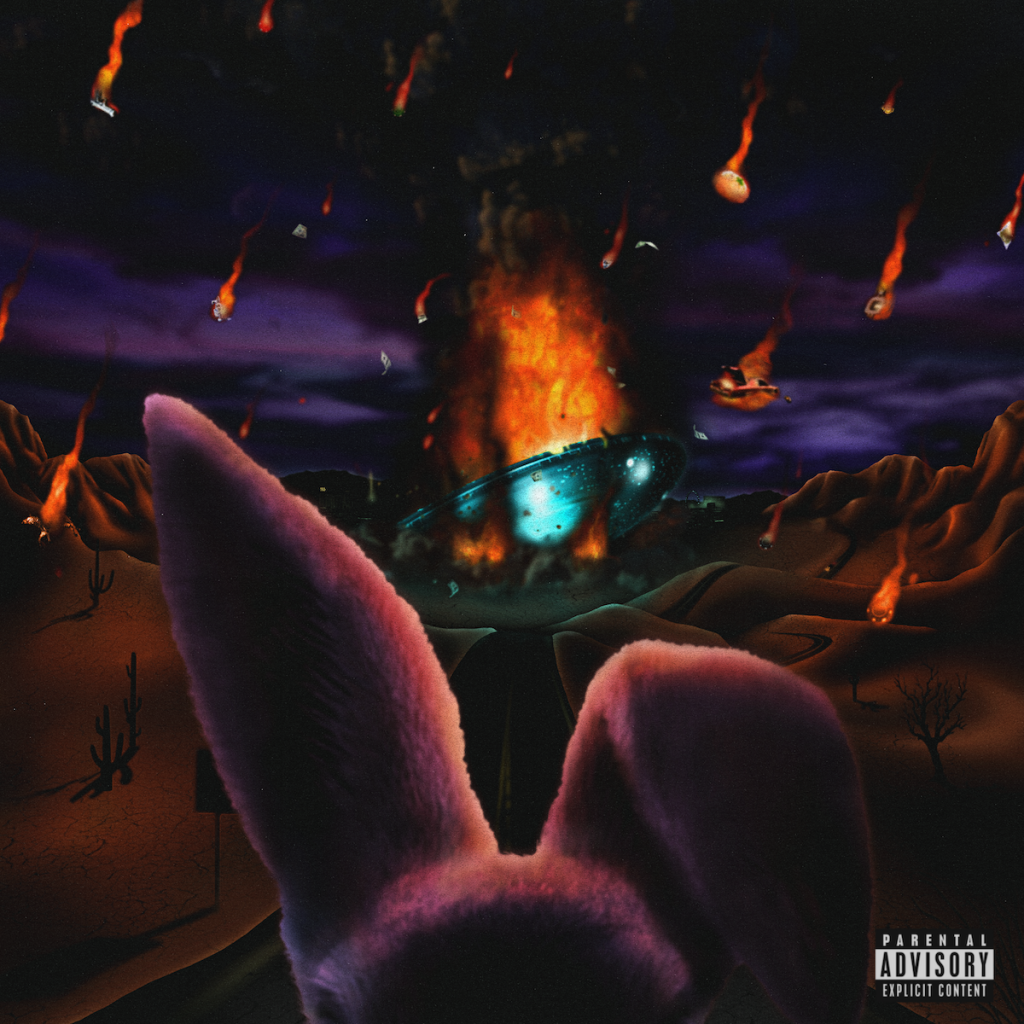

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 7.3 MB/s 
     |████████████████████████████████| 140 kB 48.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#create our credentials like clientid and client_secret as well as spotify object to access the API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = "ef9f1ca18dc247e3acd1dfadc73781c2"
client_secret = "c5d066ae6103450d8ad05b7196da5074"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
#Search for FREDDIE GIBBS
name = ["Freddie Gibbs"]
result = sp.search(name) 
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0Y4inQK6OespitzD6ijMwb'},
  'href': 'https://api.spotify.com/v1/artists/0Y4inQK6OespitzD6ijMwb',
  'id': '0Y4inQK6OespitzD6ijMwb',
  'name': 'Freddie Gibbs',
  'type': 'artist',
  'uri': 'spotify:artist:0Y4inQK6OespitzD6ijMwb'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0eVyjRhzZKke2KFYTcDkeu'},
  'href': 'https://api.spotify.com/v1/artists/0eVyjRhzZKke2KFYTcDkeu',
  'id': '0eVyjRhzZKke2KFYTcDkeu',
  'name': 'The Alchemist',
  'type': 'artist',
  'uri': 'spotify:artist:0eVyjRhzZKke2KFYTcDkeu'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'},
  'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF',
  'id': '4V8LLVI7PbaPR0K2TGSxFF',
  'name': 'Tyler, The Creator',
  'type': 'artist',
  'uri': 'spotify:artist:4V8LLVI7PbaPR0K2TGSxFF'}]

In [ ]:
#Extract Spotify albums
#Spotify URIs and album names in separate lists for later

#Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])
    
artist_album_names
artist_album_uris
#Keep names and uris in same order to keep track of duplicate albums



['spotify:album:3PZx4Vntcp5T7UgdfjnFDa',
 'spotify:album:10qigSD1XwjZL29fv36nU3',
 'spotify:album:4Qvh33TMiFWZIOoSMcM4PM',
 'spotify:album:3znl1qe13kyjQv7KcR685N',
 'spotify:album:4xW2BxaorYk4ejt78KJUVk',
 'spotify:album:31KbO7WnDp2AjPdmRTJzdf',
 'spotify:album:3JgtFZroTUGoklTtb2xOne',
 'spotify:album:6JaEv20qGvSgIHQbxwtjUu',
 'spotify:album:2LCCg172ZNVAA9aFH2EPst',
 'spotify:album:4NNUUt7gstPRwOz5aI5zwg',
 'spotify:album:41zRghNRGMG6l8dYtRp3iI',
 'spotify:album:3MmQYoMTS3hGiBLKDuId4b',
 'spotify:album:5AW4FwzZSKW1se5qWQCrR1',
 'spotify:album:1GYG80diXFWYwH7FJB7KeC',
 'spotify:album:7nfBj1HTi3LHg5lJt1LbE4',
 'spotify:album:43uErencdmuTRFZPG3zXL1',
 'spotify:album:2CKPvOCCB1aCh5ZHoXm5vT',
 'spotify:album:6z2F5JAAILOH3nyvNcECy8',
 'spotify:album:6r4A1kEu3HAGMpEYBqocVl',
 'spotify:album:15k8vlPxxEjhpHAxuwSBUh']

In [ ]:
#Extract all the songs from every album

#loop through each album to extract key track data.

def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])



In [ ]:
#apply the function to each album URI in the list to pull the track data and create an empty dictionary called to store the spotify album data.
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

$oul $old $eparately album songs has been added to spotify_albums dictionary
$oul $old $eparately album songs has been added to spotify_albums dictionary
Piñata (Deluxe Edition) album songs has been added to spotify_albums dictionary
Alfredo album songs has been added to spotify_albums dictionary
Bandana Beats album songs has been added to spotify_albums dictionary
Bandana album songs has been added to spotify_albums dictionary
Fetti album songs has been added to spotify_albums dictionary
Freddie album songs has been added to spotify_albums dictionary
You Only Live 2wice album songs has been added to spotify_albums dictionary
You Only Live 2wice album songs has been added to spotify_albums dictionary
Shadow of a Doubt album songs has been added to spotify_albums dictionary
Piñata (Alex Goose Remix) album songs has been added to spotify_albums dictionary
Piñata (Alex Goose Instrumental Remix) album songs has been added to spotify_albums dictionary
Piñata Beats album songs has been added

In [ ]:
#Extract audio features for each song

#store the audio features of each album track and append the data into lists representing all the music tracks for that album we add additional key-values.

def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [ ]:
#loop through albums extracting the audio features.add a random delay every few albums to avoid sending too many requests at Spotify's API.
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 21.74027919769287 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 33.6750385761261 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 56.511985063552856 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 71.25164985656738 seconds


In [ ]:
#add the above spotify music data to a new dataframe 
#need to first organise our data into a dictionary to convert into a dataframe.
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

306

In [ ]:
rabbit = pd.DataFrame.from_dict(dic_df)
rabbit

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,$oul $old $eparately,1,3cJhvKu04O5akhOHpZmMvP,Couldn’t Be Done (feat. Kelly Price),spotify:track:3cJhvKu04O5akhOHpZmMvP,0.3730,0.649,0.753,0.000000,0.600,-5.496,0.1090,79.975,0.434,66
1,$oul $old $eparately,2,5whawbmOtjIogkTeWv8PW3,Blackest in the Room,spotify:track:5whawbmOtjIogkTeWv8PW3,0.5290,0.621,0.597,0.000000,0.716,-7.389,0.4340,81.331,0.850,66
2,$oul $old $eparately,3,5sER6mjVIHvloVenvFbgT1,Pain & Strife (feat. Offset),spotify:track:5sER6mjVIHvloVenvFbgT1,0.0399,0.822,0.484,0.000019,0.252,-7.804,0.3410,146.984,0.342,68
3,$oul $old $eparately,4,20UFm0JkFTmqpoRjgDYHnk,Zipper Bagz,spotify:track:20UFm0JkFTmqpoRjgDYHnk,0.1660,0.789,0.610,0.000000,0.101,-7.815,0.2160,130.056,0.218,65
4,$oul $old $eparately,5,5BJUEEgABE4mB2WzVITSHH,Too Much (feat. Moneybagg Yo),spotify:track:5BJUEEgABE4mB2WzVITSHH,0.2280,0.840,0.708,0.000017,0.105,-6.315,0.0912,115.101,0.376,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Baby Face Killa,14,7dWevR2VsH0kwMavtFZx9X,Tell a Friend (feat. Curren$y),spotify:track:7dWevR2VsH0kwMavtFZx9X,0.2280,0.472,0.938,0.000353,0.212,-4.256,0.4750,174.978,0.387,28
302,Baby Face Killa,15,3OwZolOC9fGF4bH1xgJu1d,"My N*gga (feat. G-Wiz, Hit, D-Edge)",spotify:track:3OwZolOC9fGF4bH1xgJu1d,0.3270,0.748,0.798,0.000000,0.198,-6.431,0.3530,81.994,0.596,22
303,Baby Face Killa,16,6ryzmNnPfyeGZWHWZ2kfzA,"Seventeen (feat. Young Jeezy, Slick Pulla)",spotify:track:6ryzmNnPfyeGZWHWZ2kfzA,0.1440,0.427,0.677,0.000000,0.180,-5.803,0.2680,82.570,0.352,23
304,Baby Face Killa,17,5Q8OZkSffr75fhT4gWxYDJ,Breaking Bad (feat. Ea$y Money),spotify:track:5Q8OZkSffr75fhT4gWxYDJ,0.1900,0.674,0.876,0.000000,0.363,-5.497,0.2220,147.963,0.793,33


In [ ]:
#save latest album in df
soul = rabbit[rabbit.album== '$oul $old $eparately']
soul.head(5)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,$oul $old $eparately,1,3cJhvKu04O5akhOHpZmMvP,Couldn’t Be Done (feat. Kelly Price),spotify:track:3cJhvKu04O5akhOHpZmMvP,0.3730,0.649,0.753,0.000000,0.600,-5.496,0.1090,79.975,0.434,66
1,$oul $old $eparately,2,5whawbmOtjIogkTeWv8PW3,Blackest in the Room,spotify:track:5whawbmOtjIogkTeWv8PW3,0.5290,0.621,0.597,0.000000,0.716,-7.389,0.4340,81.331,0.850,66
2,$oul $old $eparately,3,5sER6mjVIHvloVenvFbgT1,Pain & Strife (feat. Offset),spotify:track:5sER6mjVIHvloVenvFbgT1,0.0399,0.822,0.484,0.000019,0.252,-7.804,0.3410,146.984,0.342,68
3,$oul $old $eparately,4,20UFm0JkFTmqpoRjgDYHnk,Zipper Bagz,spotify:track:20UFm0JkFTmqpoRjgDYHnk,0.1660,0.789,0.610,0.000000,0.101,-7.815,0.2160,130.056,0.218,65
4,$oul $old $eparately,5,5BJUEEgABE4mB2WzVITSHH,Too Much (feat. Moneybagg Yo),spotify:track:5BJUEEgABE4mB2WzVITSHH,0.2280,0.840,0.708,0.000017,0.105,-6.315,0.0912,115.101,0.376,65


In [ ]:
#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.

#print(len(soul))
#final_df = soul.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
#print(len(final_df))

In [ ]:
soul.shape

(30, 15)

In [ ]:
soul.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,8.000000,0.342160,0.681267,0.662433,0.000024,0.285330,-6.713167,0.358843,100.871833,0.528567,48.933333
std,4.394354,0.188261,0.126993,0.094737,0.000070,0.219519,1.001988,0.170128,30.539057,0.205337,16.115816
min,1.000000,0.035400,0.476000,0.484000,0.000000,0.068600,-8.399000,0.082100,49.957000,0.213000,29.000000
25%,4.250000,0.198750,0.573750,0.597500,0.000000,0.105500,-7.721000,0.213000,81.038250,0.369250,33.000000
50%,8.000000,0.328000,0.672500,0.658500,0.000000,0.247000,-6.420500,0.361000,84.889000,0.478000,54.000000
75%,11.750000,0.508250,0.787250,0.751250,0.000014,0.396500,-6.171000,0.491000,116.523000,0.672250,65.000000
max,15.000000,0.699000,0.877000,0.818000,0.000361,0.718000,-4.921000,0.668000,179.197000,0.918000,68.000000


In [ ]:
#Duplicates? 
soul.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [ ]:
# Any missing data?
soul.isnull().sum()

album               0
track_number        0
id                  0
name                0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
soul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             30 non-null     object 
 1   track_number      30 non-null     int64  
 2   id                30 non-null     object 
 3   name              30 non-null     object 
 4   uri               30 non-null     object 
 5   acousticness      30 non-null     float64
 6   danceability      30 non-null     float64
 7   energy            30 non-null     float64
 8   instrumentalness  30 non-null     float64
 9   liveness          30 non-null     float64
 10  loudness          30 non-null     float64
 11  speechiness       30 non-null     float64
 12  tempo             30 non-null     float64
 13  valence           30 non-null     float64
 14  popularity        30 non-null     int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 3.8+ KB


**K-Nearest Neighbor (KNN) Method:**

Replace missing numerical values with the average of the specific column to remove bias created by completely removing. Including the average instead of NAN is better for data mining and replacing missing values with 0 will drag down your average thus creating bias

In [ ]:
soul = soul.fillna(soul.mean())
soul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,$oul $old $eparately,1,3cJhvKu04O5akhOHpZmMvP,Couldn’t Be Done (feat. Kelly Price),spotify:track:3cJhvKu04O5akhOHpZmMvP,0.3730,0.649,0.753,0.000000,0.6000,-5.496,0.1090,79.975,0.434,66
1,$oul $old $eparately,2,5whawbmOtjIogkTeWv8PW3,Blackest in the Room,spotify:track:5whawbmOtjIogkTeWv8PW3,0.5290,0.621,0.597,0.000000,0.7160,-7.389,0.4340,81.331,0.850,66
2,$oul $old $eparately,3,5sER6mjVIHvloVenvFbgT1,Pain & Strife (feat. Offset),spotify:track:5sER6mjVIHvloVenvFbgT1,0.0399,0.822,0.484,0.000019,0.2520,-7.804,0.3410,146.984,0.342,68
3,$oul $old $eparately,4,20UFm0JkFTmqpoRjgDYHnk,Zipper Bagz,spotify:track:20UFm0JkFTmqpoRjgDYHnk,0.1660,0.789,0.610,0.000000,0.1010,-7.815,0.2160,130.056,0.218,65
4,$oul $old $eparately,5,5BJUEEgABE4mB2WzVITSHH,Too Much (feat. Moneybagg Yo),spotify:track:5BJUEEgABE4mB2WzVITSHH,0.2280,0.840,0.708,0.000017,0.1050,-6.315,0.0912,115.101,0.376,65
5,$oul $old $eparately,6,47lSZVLBTQz5rilIsZR7M2,Lobster Omelette (feat. Rick Ross),spotify:track:47lSZVLBTQz5rilIsZR7M2,0.2480,0.585,0.540,0.000000,0.2700,-8.308,0.3870,75.246,0.357,65
6,$oul $old $eparately,7,3Jez7g0MbMXh8jhkxW1uSo,Space Rabbit,spotify:track:3Jez7g0MbMXh8jhkxW1uSo,0.3700,0.646,0.697,0.000127,0.3080,-7.356,0.5990,116.528,0.329,64
7,$oul $old $eparately,8,3w0Pr8rZSnYWiipV4hgfnh,Feel No Pain (feat. Anderson .Paak & Raekwon),spotify:track:3w0Pr8rZSnYWiipV4hgfnh,0.2280,0.855,0.666,0.000043,0.0835,-4.921,0.1930,85.024,0.581,66
8,$oul $old $eparately,9,7IqheOBJjs2pZYKacBktRy,Rabbit Vision,spotify:track:7IqheOBJjs2pZYKacBktRy,0.1210,0.550,0.818,0.000000,0.6870,-5.493,0.6070,77.819,0.918,63
9,$oul $old $eparately,10,7kAyuqFCU2iYqeUao2cO21,PYS (feat. DJ Paul),spotify:track:7kAyuqFCU2iYqeUao2cO21,0.4860,0.843,0.746,0.000000,0.1470,-5.337,0.2350,116.508,0.559,65


In [ ]:
soul.head

<bound method NDFrame.head of                    album  track_number                      id  \
0   $oul $old $eparately             1  3cJhvKu04O5akhOHpZmMvP   
1   $oul $old $eparately             2  5whawbmOtjIogkTeWv8PW3   
2   $oul $old $eparately             3  5sER6mjVIHvloVenvFbgT1   
3   $oul $old $eparately             4  20UFm0JkFTmqpoRjgDYHnk   
4   $oul $old $eparately             5  5BJUEEgABE4mB2WzVITSHH   
5   $oul $old $eparately             6  47lSZVLBTQz5rilIsZR7M2   
6   $oul $old $eparately             7  3Jez7g0MbMXh8jhkxW1uSo   
7   $oul $old $eparately             8  3w0Pr8rZSnYWiipV4hgfnh   
8   $oul $old $eparately             9  7IqheOBJjs2pZYKacBktRy   
9   $oul $old $eparately            10  7kAyuqFCU2iYqeUao2cO21   
10  $oul $old $eparately            11  01doyoDfqqviVm1t8rA7I9   
11  $oul $old $eparately            12  2L5FjwGluXOyaeqn775Va0   
12  $oul $old $eparately            13  3B2qn16bjhCNA8euhVQRos   
13  $oul $old $eparately            14  2BW0B7

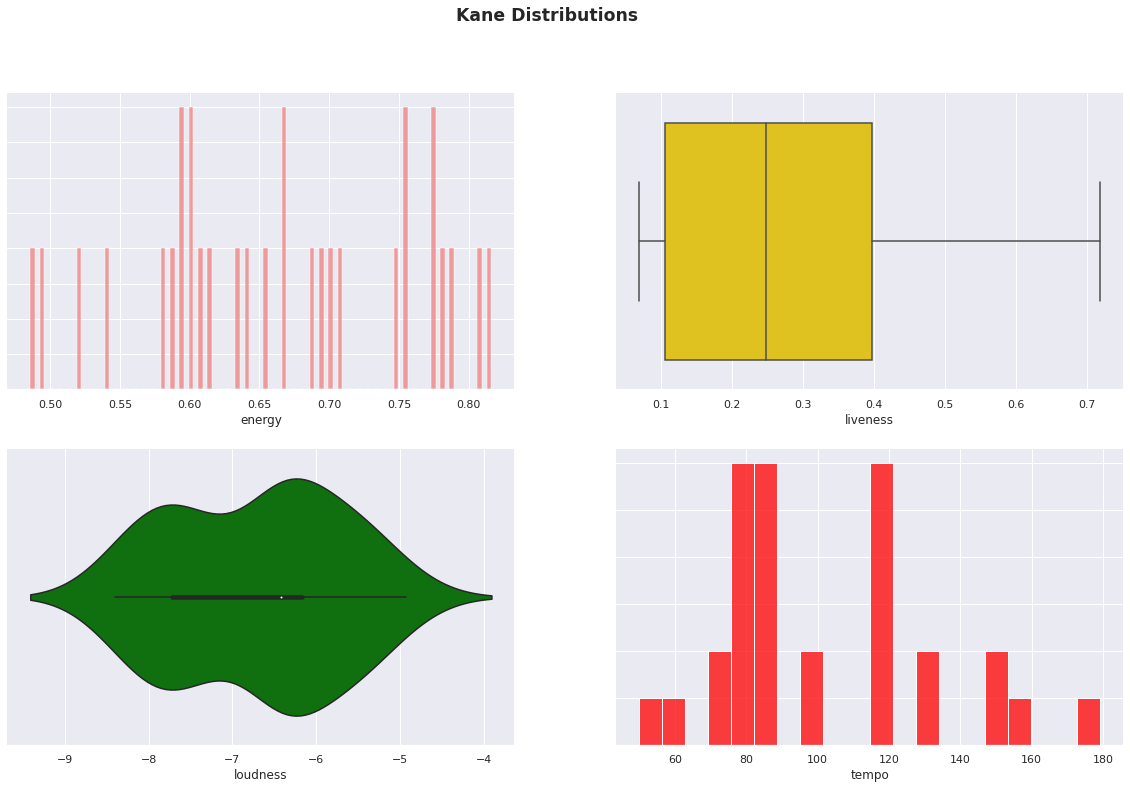

In [ ]:
#Plot distribution of certain variables
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Kane Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="energy",data=soul,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="tempo",data=soul,ax=ax[3],bins=20,color='red')
sns.boxplot(x='liveness',data=soul,ax=ax[1],color='gold')
sns.violinplot(x="loudness",data=soul,ax=ax[2],color="green")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(soul, x='track_number', y=sound_features)
fig.show()

In [ ]:
#funnel plot of energy and instrumentalness
fig = px.funnel(soul, x='track_number', y='energy', color='instrumentalness')
fig.show()

In [ ]:
#energy
top_energy = soul.nlargest(6, 'energy')

fig = px.bar(top_energy, x='track_number', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
#can you dance?
fig = px.scatter_3d(soul, x='energy', y='danceability', z='acousticness',
              color='track_number')
fig.show()

In [ ]:
soul.head(3)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,$oul $old $eparately,1,3cJhvKu04O5akhOHpZmMvP,Couldn’t Be Done (feat. Kelly Price),spotify:track:3cJhvKu04O5akhOHpZmMvP,0.3730,0.649,0.753,0.000000,0.600,-5.496,0.109,79.975,0.434,66
1,$oul $old $eparately,2,5whawbmOtjIogkTeWv8PW3,Blackest in the Room,spotify:track:5whawbmOtjIogkTeWv8PW3,0.5290,0.621,0.597,0.000000,0.716,-7.389,0.434,81.331,0.850,66
2,$oul $old $eparately,3,5sER6mjVIHvloVenvFbgT1,Pain & Strife (feat. Offset),spotify:track:5sER6mjVIHvloVenvFbgT1,0.0399,0.822,0.484,0.000019,0.252,-7.804,0.341,146.984,0.342,68


In [ ]:
#funnel plot of speechiness
fig = go.Figure(go.Funnel(
    y = soul['track_number'],
    x = soul['speechiness'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.75, marker = {"color": ["skyblue", "salmon"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["red","blue",]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [ ]:
#average speechiness
soul.groupby(by='track_number')['speechiness'].mean()

track_number
1     0.16050
2     0.45500
3     0.33450
4     0.20750
5     0.08665
6     0.39850
7     0.52750
8     0.25000
9     0.55000
10    0.24200
11    0.15050
12    0.52300
13    0.52550
14    0.36100
15    0.61050
Name: speechiness, dtype: float64